# Results inspection notebook
- This notebook loads the experiment `args.json`, `pre-train.pkl`, `post-train.pkl`, and optionally `compression.pkl`.

In [ ]:

import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import jsonschema
import pytest

sns.set(style='whitegrid')
%matplotlib inline

In [13]:
results_dir = Path('Results/data/singleshot/cifar_rand_comp1_post100')
args_path = results_dir / 'args.json'
print('Loading config from', args_path)
with open(args_path, 'r') as f:
    cfg = json.load(f)

cfg

Loading config from Results/data/singleshot/cifar_rand_comp1_post100/args.json


{'compression': 1.0,
 'compression_list': [],
 'compression_schedule': 'exponential',
 'dataset': 'cifar10',
 'dense_classifier': False,
 'experiment': 'singleshot',
 'expid': 'cifar_rand_comp1_post100',
 'gpu': 0,
 'invert': False,
 'level_list': [],
 'lr': 0.001,
 'lr_drop_rate': 0.1,
 'lr_drops': [],
 'mask_scope': 'global',
 'model': 'resnet20',
 'model_class': 'lottery',
 'no_cuda': False,
 'optimizer': 'adam',
 'post_epochs': 100,
 'pre_epochs': 0,
 'pretrained': False,
 'prune_batch_size': 256,
 'prune_batchnorm': False,
 'prune_bias': False,
 'prune_dataset_ratio': 10,
 'prune_epoch_list': [],
 'prune_epochs': 1,
 'prune_residual': False,
 'prune_train_mode': False,
 'pruner': 'rand',
 'pruner_list': [],
 'quantization': False,
 'reinitialize': False,
 'result_dir': 'Results/data/singleshot/cifar_rand_comp1_post100',
 'save': True,
 'save_trace': False,
 'seed': 1,
 'shuffle': False,
 'test_batch_size': 256,
 'train_batch_size': 256,
 'verbose': False,
 'weight_decay': 0.0,
 'w

Config just to sanity check. now lets looks at train and test stuff

In [ ]:

pre_path = results_dir / 'pre-train.pkl'
post_path = results_dir / 'post-train.pkl'

pre = pd.read_pickle(pre_path)
post = pd.read_pickle(post_path)

print('Pre-train (first/last rows)')
display(pd.concat([pre.head(1), pre.tail(1)]))
print('\nPost-train (first/last rows)')
display(pd.concat([post.head(1), post.tail(1)]))

Pre-train (first/last rows)


,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,58.017824,10.0,50.0,0.673103
0,NaN,58.017824,10.0,50.0,0.673103



Post-train (first/last rows)


,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,2.303050,9.28,49.16,0.283805
100,0.447634,0.563461,81.73,99.14,0.271465


In [25]:
results_root = Path('Results/data/singleshot/mnist_mag_comp1_post100')
post = results_root / 'post-train.pkl'
mnist_mag = pd.read_pickle(post)
mnist_mag.head()

,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,2.413064,13.43,69.19,0.025267
1,0.270068,0.117736,96.93,99.69,0.033191
2,0.072154,0.103779,97.32,99.78,0.023646
3,0.053690,0.100384,97.45,99.75,0.024339
4,0.043021,0.099984,97.45,99.77,0.025333


In [30]:
df = pd.read_pickle('Results/data/singleshot/mnist_mag_comp1_post100/compression.pkl')
df

,module,param,sparsity,size,shape,flops,score mean,score variance,score sum,score abs mean,score abs variance,score abs sum,prunable
0,1,weight,0.092653,78400,"(100, 784)",78400,0.102268,0.011823,8017.782227,0.102268,0.011823,8017.782227,True
1,1,bias,1.000000,100,"(100,)",100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
2,3,weight,0.155700,10000,"(100, 100)",10000,0.143698,0.014435,1436.983643,0.143698,0.014435,1436.983643,True
3,3,bias,1.000000,100,"(100,)",100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
4,5,weight,0.135300,10000,"(100, 100)",10000,0.135582,0.012650,1355.817139,0.135582,0.012650,1355.817139,True
5,5,bias,1.000000,100,"(100,)",100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
6,7,weight,0.094800,10000,"(100, 100)",10000,0.118539,0.009362,1185.386841,0.118539,0.009362,1185.386841,True
7,7,bias,1.000000,100,"(100,)",100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
8,9,weight,0.059200,10000,"(100, 100)",10000,0.105449,0.007127,1054.493652,0.105449,0.007127,1054.493652,True
9,9,bias,1.000000,100,"(100,)",100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False


,expid,dataset,final_top1,final_train_loss,n_epochs
1,cifar_mag_comp1_post100,cifar10,85.02,3.038874e-01,101
2,cifar_rand_comp1_post100,cifar10,81.73,4.476343e-01,101
3,cifar_snip_comp1_post100,cifar10,80.19,4.885971e-01,101
0,cifar_grasp_comp1_post100,cifar10,79.21,5.045893e-01,101
4,cifar_synflow_comp1_post100,cifar10,44.20,1.314787e+00,101
6,mnist_mag_comp1_post100,mnist,97.68,3.111353e-08,101
8,mnist_snip_comp1_post100,mnist,96.66,6.650984e-03,101
5,mnist_grasp_comp1_post100,mnist,96.39,1.523982e-02,101
7,mnist_rand_comp1_post100,mnist,95.96,2.081826e-02,101
9,mnist_synflow_comp1_post100,mnist,11.35,2.301242e+00,101


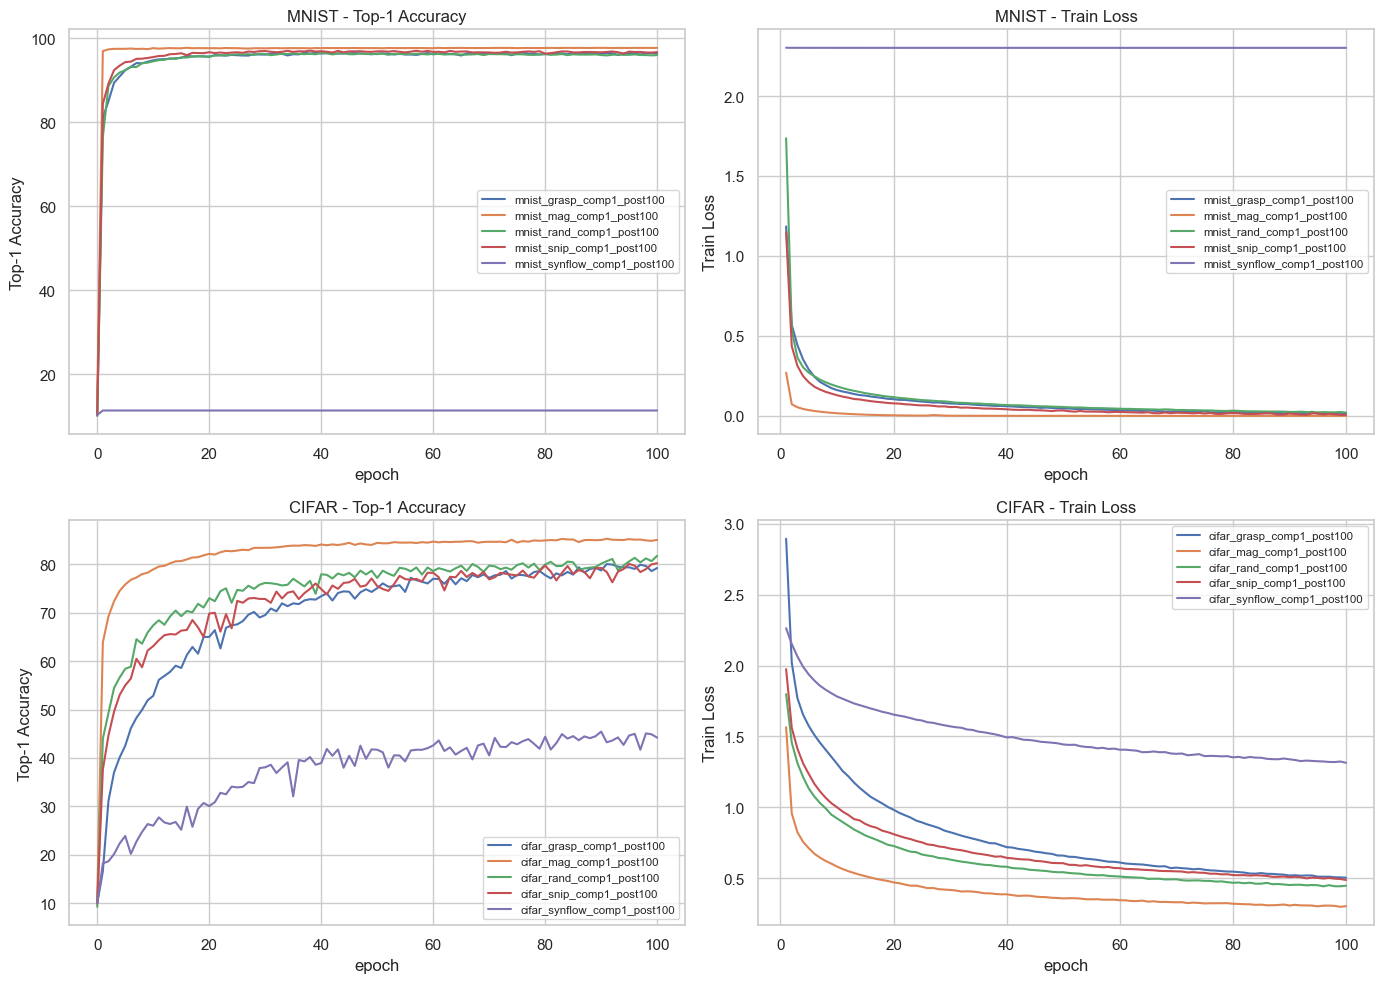

In [16]:
# Section 8: Plot top-1 accuracy and train loss for MNIST and CIFAR runs separately
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

results_root = Path('Results/data')
args_paths = sorted(results_root.glob('**/args.json'))
runs = []
for p in args_paths:
    try:
        with open(p, 'r') as f:
            run_cfg = json.load(f)
        runs.append((p.parent, run_cfg))
    except Exception as e:
        print(f'Warning: could not read {p}: {e}')

# Prepare figure: 2 rows (MNIST, CIFAR), 2 columns (Top1, Train loss)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
(ax_mnist_top1, ax_mnist_loss), (ax_cifar_top1, ax_cifar_loss) = axes

# Helper to pick dataframe
def load_best_df(run_dir):
    post = run_dir / 'post-train.pkl'
    pre = run_dir / 'pre-train.pkl'
    if post.exists():
        return pd.read_pickle(post)
    if pre.exists():
        return pd.read_pickle(pre)
    return None

# Plot runs
for run_dir, run_cfg in runs:
    ds = (run_cfg.get('dataset') or '').lower()
    df = load_best_df(run_dir)
    if df is None:
        continue
    label = f"{run_dir.name}"
    try:
        if ds == 'mnist':
            ax_mnist_top1.plot(df['top1_accuracy'].reset_index(drop=True), label=label)
            ax_mnist_loss.plot(df['train_loss'].reset_index(drop=True), label=label)
        elif ds.startswith('cifar'):
            ax_cifar_top1.plot(df['top1_accuracy'].reset_index(drop=True), label=label)
            ax_cifar_loss.plot(df['train_loss'].reset_index(drop=True), label=label)
    except Exception as e:
        print(f'Warning plotting {run_dir}: {e}')

# Labels and titles
ax_mnist_top1.set_title('MNIST - Top-1 Accuracy')
ax_mnist_top1.set_xlabel('epoch')
ax_mnist_top1.set_ylabel('Top-1 Accuracy')
ax_mnist_top1.legend(fontsize='x-small')

ax_mnist_loss.set_title('MNIST - Train Loss')
ax_mnist_loss.set_xlabel('epoch')
ax_mnist_loss.set_ylabel('Train Loss')
ax_mnist_loss.legend(fontsize='x-small')

ax_cifar_top1.set_title('CIFAR - Top-1 Accuracy')
ax_cifar_top1.set_xlabel('epoch')
ax_cifar_top1.set_ylabel('Top-1 Accuracy')
ax_cifar_top1.legend(fontsize='x-small')

ax_cifar_loss.set_title('CIFAR - Train Loss')
ax_cifar_loss.set_xlabel('epoch')
ax_cifar_loss.set_ylabel('Train Loss')
ax_cifar_loss.legend(fontsize='x-small')

plt.tight_layout()

# Optional summary table showing final values for MNIST and CIFAR runs
summary = []
for run_dir, run_cfg in runs:
    df = load_best_df(run_dir)
    if df is None:
        continue
    ds = (run_cfg.get('dataset') or '').lower()
    if ds in ('mnist',) or ds.startswith('cifar'):
        try:
            summary.append({
                'expid': run_dir.name,
                'dataset': ds,
                'final_top1': float(df['top1_accuracy'].iloc[-1]),
                'final_train_loss': float(df['train_loss'].iloc[-1]),
                'n_epochs': len(df)
            })
        except Exception:
            pass

if summary:
    summary_df = pd.DataFrame(summary)
    display(summary_df.sort_values(['dataset','final_top1'], ascending=[True, False]))
else:
    print('No run results found to summarize.')